#Time Domain Zero Padding

Zero padding reffers to adding a bunch of zeros towards the end of the series. This will increase the frequency resolution in the Fourier Transform.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fftpack

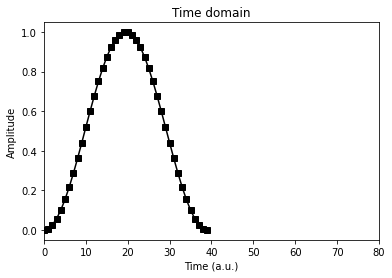

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


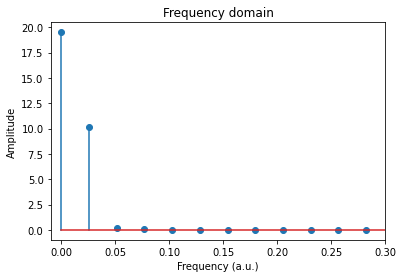

In [2]:
# create the signal
signal = np.hanning(40)

# for the manual zero-padding, you can just uncomment the following line.
#signal = np.concatenate((signal,np.zeros(len(signal))),axis=0)

# time the fast Fourier transform
signalX = scipy.fftpack.fft(signal)

# extract amplitude
ampl = np.abs(signalX)

# normalized frequency units
frequnits = np.linspace(0,1,len(signal))

# and plot
plt.plot(signal,'ks-')
plt.xlim(0,80)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

plt.stem(frequnits,ampl)
plt.xlim(-.01,.3)
plt.xlabel('Frequency (a.u.)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

Zero padding (Manually adding a number of zeros)

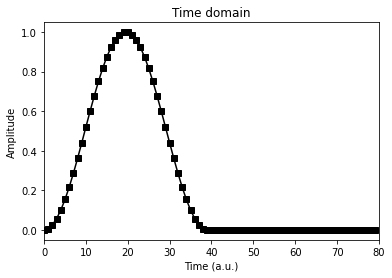

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


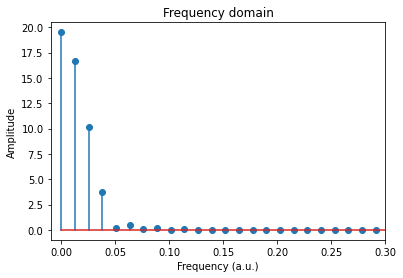

In [4]:
# create the signal
signal = np.hanning(40)


signal = np.concatenate((signal,np.zeros(len(signal))),axis=0) #Zero padding

# time the fast Fourier transform
signalX = scipy.fftpack.fft(signal)

# extract amplitude
ampl = np.abs(signalX)

# normalized frequency units
frequnits = np.linspace(0,1,len(signal))

# and plot
plt.plot(signal,'ks-')
plt.xlim(0,80)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

plt.stem(frequnits,ampl)
plt.xlim(-.01,.3)
plt.xlabel('Frequency (a.u.)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

Resolution Increase. Earlier we were  going from 0 to 1 in 40 steps;  now we are going in 80 steps.

But this isn't the most efficient way to zero pad a signal (viz. manually). One should zero pad it within the fft Function as shown below:-

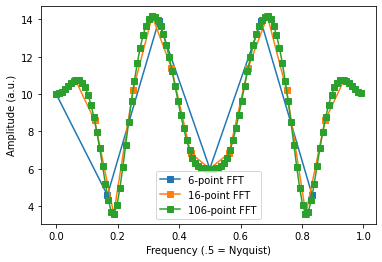

In [8]:
# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# number of zeros to add after signal
n2pad = [ 0, 10, 100 ]
# 0 zeros = 6-point fft
# 10 zeros = 16-point fft
# 100 zeros = 160-point fft

for zi in range(0,len(n2pad)):
    
    # total length of signal
    zeropadN = len(signal)+n2pad[zi]
    
    # FFT and amplitude
    sigampl   = np.abs( scipy.fftpack.fft(signal,zeropadN) ) 
    # Remember: zeropadN != number of zeros; but the total length of the signal 
    
    frequnits = np.linspace(0,1,zeropadN+1)
    
    # and plot
    plt.plot(frequnits[:-1],sigampl,'s-',label='%g-point FFT' %zeropadN)


# add some plot extras
plt.legend()
plt.xlabel('Frequency (.5 = Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

The Amplitude isn't accurate. Lack of normalizations.
#Applying Normalizations

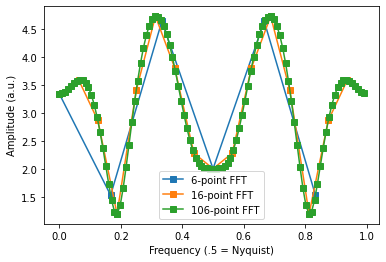

In [7]:
# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# number of zeros to add after signal
n2pad = [ 0, 10, 100 ]
# 0 zeros = 6-point fft
# 10 zeros = 16-point fft
# 100 zeros = 160-point fft

for zi in range(0,len(n2pad)):
    
    # total length of signal
    zeropadN = len(signal)+n2pad[zi]
    
    # FFT and amplitude
    sigampl   = 2*np.abs( scipy.fftpack.fft(signal,zeropadN) ) #Normalization 1: Doubling
    # Remember: zeropadN != number of zeros; but the total length of the signal 
    

    # Normalization 2: Divition by length of the signal
    sigampl = sigampl / len(signal)
    
    frequnits = np.linspace(0,1,zeropadN+1)
    
    # and plot
    plt.plot(frequnits[:-1],sigampl,'s-',label='%g-point FFT' %zeropadN)


# add some plot extras
plt.legend()
plt.xlabel('Frequency (.5 = Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.show()